# Daily Risk Metrics for E-commerce Purchase Behavior

In [ ]:
import pandas as pd

# Read the original data
df = pd.read_csv('2019-Nov.csv') 

# Time processing
df['event_time'] = pd.to_datetime(df['event_time'])
df['date'] = df['event_time'].dt.date

# Filter for purchase events only
df_purchases = df[df['event_type'] == 'purchase']

# Compute daily metrics
daily_metrics = df_purchases.groupby('date').agg(
    total_orders=('user_session', 'nunique'),
    total_users=('user_id', 'nunique'),
    total_revenue=('price', 'sum'),
    avg_order_value=('price', 'mean')
).reset_index()

# Calculate order volatility (rolling standard deviation over 7 days)
daily_metrics['order_volatility'] = daily_metrics['total_orders'].rolling(window=7).std()

# Save to CSV
daily_metrics.to_csv('daily_risk_metrics.csv', index=False)


# Risk Exposure Analysis
This notebook analyzes volatility and behavioral risks in e-commerce data.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('daily_risk_metrics.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,total_orders,total_users,total_revenue,avg_order_value,order_volatility
0,2019-11-01,19215,16372,6949415.03,309.440513,NaN
1,2019-11-02,18825,16187,6389808.37,292.252487,NaN
2,2019-11-03,19168,16550,6656920.09,300.606010,NaN
3,2019-11-04,23338,19915,8033899.65,298.780157,NaN
4,2019-11-05,21408,18287,7250120.41,291.462127,NaN


## Volatility Plot

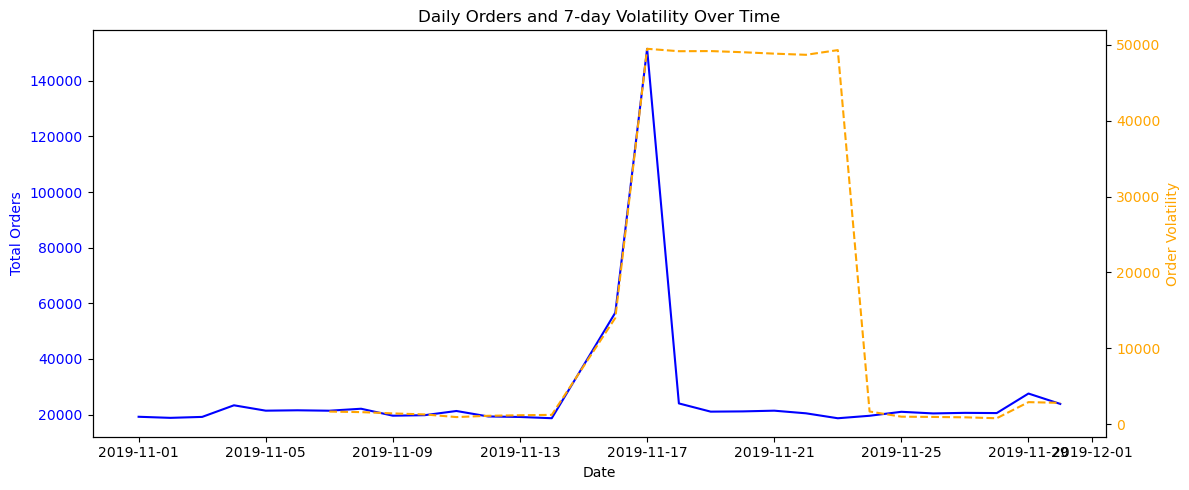

In [39]:
# Load daily risk metrics data
df = pd.read_csv("daily_risk_metrics.csv")
df["date"] = pd.to_datetime(df["date"])

# Create a dual-axis line chart
fig, ax1 = plt.subplots(figsize=(12, 5))

# Left y-axis: daily total orders
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Orders", color="blue")
ax1.plot(df["date"], df["total_orders"], color="blue", label="Daily Total Orders")
ax1.tick_params(axis="y", labelcolor="blue")

# Right y-axis: order volatility
ax2 = ax1.twinx()
ax2.set_ylabel("Order Volatility", color="orange")
ax2.plot(df["date"], df["order_volatility"], color="orange", linestyle="--", label="7-day Order Volatility")
ax2.tick_params(axis="y", labelcolor="orange")

# Chart title and layout
plt.title("Daily Orders and 7-day Volatility Over Time")
fig.tight_layout()
plt.show()

### Peak Period Top-Selling Categories Analysis

In [17]:
df = pd.read_csv("2019-Nov.csv") 
df['event_time'] = pd.to_datetime(df['event_time'])
df['date'] = df['event_time'].dt.date

In [19]:
target_dates = ['2019-11-16', '2019-11-17', '2019-11-18']
df_peak = df[(df['event_type'] == 'purchase') & (df['date'].astype(str).isin(target_dates))]

In [21]:
top_categories = df_peak.groupby('category_code').agg(
    order_count=('user_session', 'nunique'),
    total_sales=('price', 'sum')
).sort_values(by='order_count', ascending=False).reset_index()

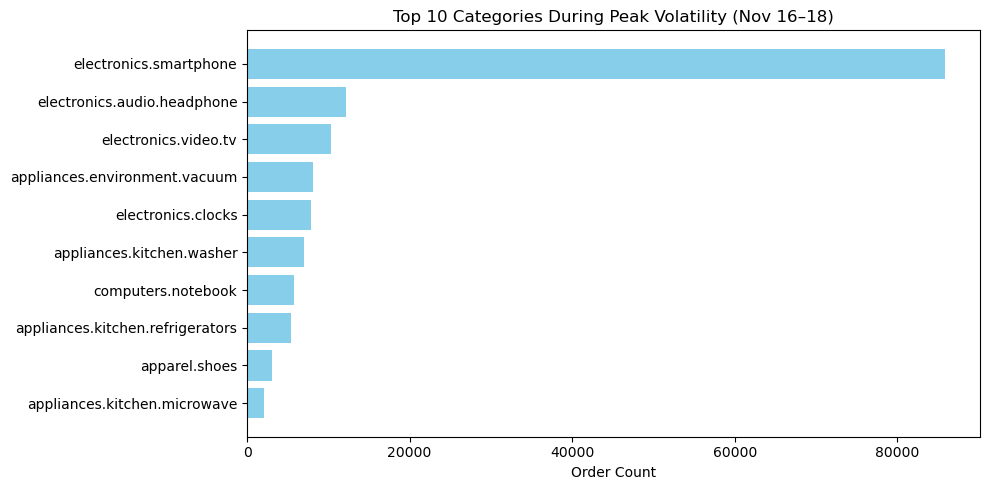

In [23]:
import matplotlib.pyplot as plt

top10 = top_categories.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top10['category_code'], top10['order_count'], color='skyblue')
plt.xlabel('Order Count')
plt.title('Top 10 Categories During Peak Volatility (Nov 16–18)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
